In [1]:
import ROOT
from draw_funcs import draw_chi2_gaussian_sim
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
mfield = 1.3
input_path = "/var/kinfit/data/tr_ph_run049912.root"
output_path = "kinfit_gsim_kskpi_run049912.root"

In [3]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/gaussgen/share/gaussgen/rootlogon.C")')

0

(int) 0


In [4]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/kfcmd/share/kfcmd/rootlogon.C")')

0

(int) 0


In [5]:
ROOT.gInterpreter.ProcessLine('.L TrPh.C++')

0

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/gauss_sim_kskpi_sim_hypo_all_events/TrPh_C.so


In [6]:
ROOT.gInterpreter.ProcessLine('TFile fl("{}", "read")'.format(input_path))

140337221693480

(TFile &) Name: /var/kinfit/data/tr_ph_run049912.root Title: 


In [7]:
ROOT.gInterpreter.ProcessLine('TrPh a(tr_ph)')

140335416213504

(TrPh &) @0x7fa262a20000


In [8]:
ROOT.gInterpreter.ProcessLine('a.Loop("{output_path}", {mfield})'.format(output_path=output_path, mfield=mfield))

0

In [9]:
ROOT.gInterpreter.ProcessLine('fl.Close()')

0

In [10]:
fl = TFile.Open(output_path, 'read')

In [11]:
ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
                                        return 0.5859375 * p[0] * ROOT::Math::chisquared_pdf(x[0], p[1]);}''')

0

In [12]:
ROOT.gInterpreter.ProcessLine('TF1 f0("f0", fcn, 0, 200, 2)')

140337221694352

(TF1 &) Name: f0 Title: f0


In [13]:
ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 1.e+3)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(1, 10)')

0

In [14]:
ROOT.gInterpreter.ProcessLine('kf_chi2->Fit(&f0)')

94130485485728

 FCN=5354.16 FROM MIGRAD    STATUS=CONVERGED      46 CALLS          47 TOTAL
                     EDM=1.23715e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.36648e+04   1.16897e+02   4.17610e+00  -1.42024e-07
   2  p1           1.12946e+01   5.59666e-02   2.00070e-03  -8.37913e-04
(TFitResultPtr) <nullptr TFitResult>


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


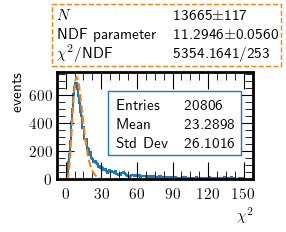

In [18]:
draw_chi2_gaussian_sim("kf_chi2", "f0", 
                       xlabel=r'$\chi^2$',
                       ylabel='events',
                      fraction=0.47,
                       info_coords=(0.3, 0.3),
                       dh=0.8, dw=-0.3,
                      h_y=200, h_x=30)
plt.savefig('kf_chi2_gsim_kskpi_all_events.eps', bbox_inches='tight')

In [16]:
# fl.Close()